#Extracción de características: TF-IDF - CountVectorizer()

Se utiliza para calificar la importancia de una palabra en un documento en función de la frecuencia con la que apareció en ese documento y en una colección determinada de documentos.

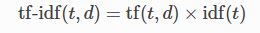

t representa el término

d representa el documento

**TF-IDF** es una de las mejores métricas para determinar qué tan significativo es un término para un texto en una serie o corpus. 
**TF-IDF** es un sistema de ponderación que asigna una ponderación a cada palabra en un documento en función de su frecuencia de término (TF) y la frecuencia de documento recíproca (TF)(IDF). Las palabras con puntuaciones más altas de peso se consideran más significativas.

En Python, los valores TF-IDF se pueden calcular utilizando el método *TfidfVectorizer()*

**Sintaxis:**

    sklearn.feature_extraction.text.TfidfVectorizer (entrada)

Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF, es equivalente a CountVectorizer.

**Parámetros**


*   **entrada:** puede ser nombre de archivo, archivo o contenido en sí.

**Atributos**


*   **Vocabulario:** Devuelve un diccionario de términos como claves y valores como índices de características.
*   **IDF:** Devuelve el vector de frecuencia de documento inverso.

**Devoluciones**


*   **fit_transform():**Devuelve una matriz de términos junto con los valores TF-IDF
*   **get_features_names():** Devuelve una lista de nombres de funciones.







#Librerías de trabajo

**Importar Librerías**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Ejemplo con palabras claves de artículos de minería de texto

In [ ]:
corpus = [
'The artificial intelligence',
'data mining',
'Bibliometric analysis',
'artificial',
'text analysis',
'Bibliometric',
'The text mining',
'mining'
]
print(corpus)

['The artificial intelligence', 'data mining', 'Bibliometric analysis', 'artificial', 'text analysis', 'Bibliometric', 'The text mining', 'mining']


En la siguiente línea de código, se tiene almacenado en la variable corpus una cadena de caracteres y por medio de las funciones CountVectorizer() y fit_transform() se podrán separar cada una de las palabras que lo componen.

In [ ]:
cv = CountVectorizer(stop_words='english')
print(cv)
data = cv.fit_transform(corpus)
print(data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 1)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (2, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 6)	1
  (5, 2)	1
  (6, 5)	1
  (6, 6)	1
  (7, 5)	1


In [ ]:
print(cv.vocabulary_)

{'artificial': 1, 'intelligence': 4, 'data': 3, 'mining': 5, 'bibliometric': 2, 'analysis': 0, 'text': 6}


In [ ]:
print('Frecuencias:')
print(data)

Frecuencias:
  (0, 1)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (2, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 6)	1
  (5, 2)	1
  (6, 5)	1
  (6, 6)	1
  (7, 5)	1


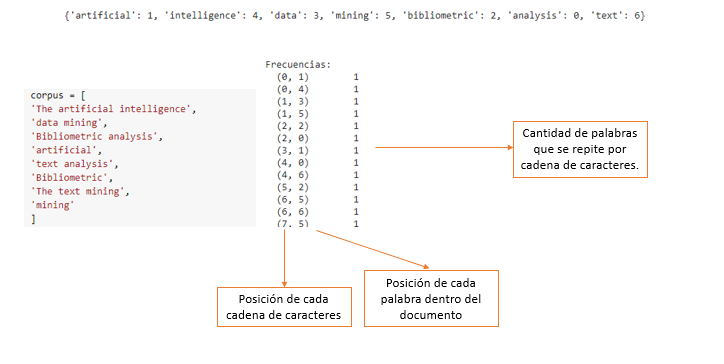

In [ ]:
print('Matriz:')
print(data.toarray())

Matriz:
[[0 1 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0]]


La primera línea de la matriz se refiere a la primera cadena, 1 cuando si aparece, 0 cuando no, si aparecen 2 veces entonces en vez de 1, sería el número 2, y así con cada línea de la matriz.

In [ ]:
tfidf_trans = TfidfTransformer()
tfidf_matrix = tfidf_trans.fit_transform(data)
print(tfidf_matrix)
print(tfidf_trans)

  (0, 4)	0.7664298449085388
  (0, 1)	0.6423280258820045
  (1, 5)	0.5860071879963084
  (1, 3)	0.810305853129952
  (2, 2)	0.7071067811865475
  (2, 0)	0.7071067811865475
  (3, 1)	1.0
  (4, 6)	0.7071067811865475
  (4, 0)	0.7071067811865475
  (5, 2)	1.0
  (6, 6)	0.757091999321284
  (6, 5)	0.6533082768216707
  (7, 5)	1.0
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [ ]:
palabras = dict(zip(cv.get_feature_names(),tfidf_trans.idf_))
print(palabras)

{'analysis': 2.09861228866811, 'artificial': 2.09861228866811, 'bibliometric': 2.09861228866811, 'data': 2.504077396776274, 'intelligence': 2.504077396776274, 'mining': 1.8109302162163288, 'text': 2.09861228866811}


In [ ]:
for palabra, puntuacion in palabras.items():
    print(palabra, puntuacion)

analysis 2.09861228866811
artificial 2.09861228866811
bibliometric 2.09861228866811
data 2.504077396776274
intelligence 2.504077396776274
mining 1.8109302162163288
text 2.09861228866811


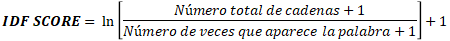

Para el caso de la palabra artificial, tenemos

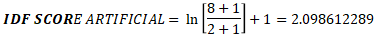

In [ ]:
# Para conocer la puntuación por palabra, sería:
print('Puntuación de artificial es: ', palabras['artificial'])

Puntuación de artificial es:  2.09861228866811


# Ejemplo con palabras claves de artículos de minería de texto - stop_words 

Si quisiera que no se contaran algunas palabras puntuales dentro de mi conjunto de palabras, utilizo un nuevo stop_words

In [ ]:
cv = CountVectorizer(stop_words= ['artificial'])
data = cv.fit_transform(corpus)
print(cv.vocabulary_)
print('Frecuencias:')
print(data)
print('Matriz:')
print(data.toarray())
tfidf_trans = TfidfTransformer()
tfidf_matrix = tfidf_trans.fit_transform(data)
palabras = dict(zip(cv.get_feature_names(),tfidf_trans.idf_))
for palabra, puntuacion in palabras.items():
    print(palabra, puntuacion)
print('Puntuación de mining es: ', palabras['mining'])

{'the': 6, 'intelligence': 3, 'data': 2, 'mining': 4, 'bibliometric': 1, 'analysis': 0, 'text': 5}
Frecuencias:
  (0, 6)	1
  (0, 3)	1
  (1, 2)	1
  (1, 4)	1
  (2, 1)	1
  (2, 0)	1
  (4, 0)	1
  (4, 5)	1
  (5, 1)	1
  (6, 6)	1
  (6, 4)	1
  (6, 5)	1
  (7, 4)	1
Matriz:
[[0 0 0 1 0 0 1]
 [0 0 1 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0]]
analysis 2.09861228866811
bibliometric 2.09861228866811
data 2.504077396776274
intelligence 2.504077396776274
mining 1.8109302162163288
text 2.09861228866811
the 2.09861228866811
Puntuación de mining es:  1.8109302162163288


# Imputación de valores faltantes o perdidos

**Imputación de valores faltantes**

---
**KNNImputer**

Una metodología de imputación muy utilizada que funciona en datos es el algoritmo de los K-vecinos más cercanos (KNN) que identifica los puntos vecinos a través de una medida de distancia y los valores faltantes se pueden estimar usando valores completos de observaciones vecinas.






In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://gitlab.com/luisvasv/public/-/raw/master/datasets/001.analitica.predictiva/002.titanic.csv')
print(df)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [4]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

Para identificar valores faltantes usaremos 'isna()' y 'any()'

In [5]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

Los False se marcan como 0 y los True como 1

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Sabemos entonces que Edad y Embarcado tienen valores perdidos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
from sklearn.impute import KNNImputer

Se debe tener en cuenta que este algoritmo no reconoce valores de datos de texto; por lo que si no cambiamos estos valores a numéricos.

Para nuestro caso las columnas 'Sexo' y 'embarcado' tienen datos de texto.

In [9]:
variables = df[['Sex','Embarked']]
print(variables)

        Sex Embarked
0      male        S
1    female        C
2    female        S
3    female        S
4      male        S
..      ...      ...
886    male        S
887  female        S
888  female        S
889    male        C
890    male        Q

[891 rows x 2 columns]


In [10]:
dummies = pd.get_dummies(variables, drop_first=True)
dummies.head()

Sex_male  Embarked_Q  Embarked_S
0         1           0           1
1         0           0           0
2         0           0           1
3         0           0           1
4         1           0           1

A continuación, eliminamos las columnas originales 'Sex' y 'Embarked' del conjunto de datos y agregamos las variables ficticias.

In [12]:
df = df.drop(['Sex','Embarked'], axis = 1)

In [20]:
df = pd.concat([df,dummies], axis = 1)
df.head()

Survived  Pclass   Age  SibSp  ...  Embarked_S  Sex_male  Embarked_Q  Embarked_S
0         0       3  22.0      1  ...           1         1           0           1
1         1       1  38.0      1  ...           0         0           0           0
2         1       3  26.0      0  ...           1         0           0           1
3         1       1  35.0      1  ...           1         0           0           1
4         0       3  35.0      0  ...           1         1           0           1

[5 rows x 15 columns]

Para hacer el proceso de imputación, primero es necesario normalizar los datos, ya que es un método basado en distancias, por lo que si no se realiza el proceso de normalización, las diferentes escalas de los datos llevarán a KNN Imputer a generar reemplazos sesgados para los valores faltantes. 

Para esto utilizamos MinMaxScaler y las escala de nuestras variables estarán entre 0 y 1.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
escala = MinMaxScaler()
df = pd.DataFrame(escala.fit_transform(df), columns = df.columns)
df.head()

Survived  Pclass       Age  ...  Sex_male  Embarked_Q  Embarked_S
0       0.0     1.0  0.271174  ...       1.0         0.0         1.0
1       1.0     0.0  0.472229  ...       0.0         0.0         0.0
2       1.0     1.0  0.321438  ...       0.0         0.0         1.0
3       1.0     0.0  0.434531  ...       0.0         0.0         1.0
4       0.0     1.0  0.434531  ...       1.0         0.0         1.0

[5 rows x 15 columns]

Ahora pasaremos a la imputación de valores perdidos con KNNImputer, y para este ejemplo se configura el parámetro 'n-neighbors' como 5.

Por lo que los valores faltantes serán reemplazados por el valor medio de los 5 vecinos más cercanos medidos por la distancia euclidiana.

In [25]:
from sklearn.impute import KNNImputer

In [27]:
val_imp = KNNImputer(n_neighbors=5)
df = pd.DataFrame(val_imp.fit_transform(df), columns = df.columns)
df.head()

Survived  Pclass       Age  ...  Sex_male  Embarked_Q  Embarked_S
0       0.0     1.0  0.271174  ...       1.0         0.0         1.0
1       1.0     0.0  0.472229  ...       0.0         0.0         0.0
2       1.0     1.0  0.321438  ...       0.0         0.0         1.0
3       1.0     0.0  0.434531  ...       0.0         0.0         1.0
4       0.0     1.0  0.434531  ...       1.0         0.0         1.0

[5 rows x 15 columns]

In [29]:
df.isna().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
Sex_male      False
Embarked_Q    False
Embarked_S    False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [30]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64